<a href="https://colab.research.google.com/github/HadiAskari/YouTube_Denoiser_Models/blob/main/YouTube_Denoising_%2B_Category_Distribution_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import json
import numpy as np
import pickle 
from collections import defaultdict
import pickle 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from keras.models import load_model
from sklearn.model_selection import train_test_split
import copy
import h5py

In [ ]:
os.chdir('/content/drive/My Drive/YT/denoiser/New')

In [ ]:
with open('sock_puppets_rl_final_new2_cate_test4.json', 'r') as f:
    
    read_item=json.load(f)

In [ ]:
print(read_item[2]['data'].keys())

obfu_1


In [ ]:
print(read_item[2]['data'][2000].keys())

dict_keys(['viewed', 'initial_homepage', 'recommendation_trail', 'homepage', 'start_time', 'end_time', 'puppetId', 'video_seq', 'user_id'])


In [ ]:
unobfuscated_videos_raw={}
obfuscated_videos_raw={}
unobfuscated_recommendations_raw={}
obfuscated_recommendations_raw={}

for i in range(int(len(read_item[2]['data'])/2)):
  key=read_item[2]['data'][i]['user_id']
  unobfuscated_videos_raw[key]=read_item[2]['data'][i]['viewed']
  unobfuscated_recommendations_raw[key]=read_item[2]['data'][i]['homepage']

In [ ]:
print(unobfuscated_videos_raw.keys())

dict_keys(['base_0', 'base_1', 'base_10', 'base_100', 'base_1000', 'base_1001', 'base_1002', 'base_1003', 'base_1004', 'base_1005', 'base_1006', 'base_1007', 'base_1008', 'base_1009', 'base_101', 'base_1010', 'base_1011', 'base_1012', 'base_1013', 'base_1014', 'base_1015', 'base_1016', 'base_1017', 'base_1018', 'base_1019', 'base_102', 'base_1020', 'base_1021', 'base_1022', 'base_1023', 'base_1024', 'base_1025', 'base_1026', 'base_1027', 'base_1028', 'base_1029', 'base_103', 'base_1030', 'base_1031', 'base_1032', 'base_1033', 'base_1034', 'base_1035', 'base_1036', 'base_1037', 'base_1038', 'base_1039', 'base_104', 'base_1040', 'base_1041', 'base_1042', 'base_1043', 'base_1044', 'base_1045', 'base_1046', 'base_1047', 'base_1048', 'base_1049', 'base_105', 'base_1050', 'base_1051', 'base_1052', 'base_1053', 'base_1054', 'base_1055', 'base_1056', 'base_1057', 'base_1058', 'base_1059', 'base_106', 'base_1060', 'base_1061', 'base_1062', 'base_1063', 'base_1064', 'base_1065', 'base_1066', 'ba

In [ ]:
for i in range(int(len(read_item[2]['data'])/2)):
  key=read_item[2]['data'][i+1500]['user_id']
  obfuscated_videos_raw[key]=read_item[2]['data'][i+1500]['viewed']
  obfuscated_recommendations_raw[key]=read_item[2]['data'][i+1500]['homepage']

In [ ]:
print(len(unobfuscated_recommendations_raw.keys()))

1499


In [ ]:
print(unobfuscated_videos_raw['base_0'])

['gK3Gerx_JvQ', 'rFtfBqnVAIY', 'lL0Awp-uah4', 'MNWC4NMWfe8', 'VZwZ5-YWWIg', 'e26zZ83Oh6Y', 'cTfxennz3xU', 'PK-Tn6R8f0s', 'NruWYK-KA6w', 'T7XfKf46iZY', 'hnB8jLCznHI', 'GDwVXxYbLeM', 'etG-u27CrRw', 'B7YDcLP2DeY', '4yQkik5IHMY', 'Aq-Hq62B8os', 'kLP1s0IeIWw', 'fdyFGUh_Kpo', 'V4PPWYCqPKo', 'RcXSfVyb7aQ', '8Qt3EZ19s_Y', 'aYNaS6r4H4Q', 'URjAZwhZ334', 'B83nmCSwRuw', 'KHBe0jT6S3U', 'G-AAx1SR_YU', '8ssAzbZBhqs', 'lNGQmzob_ew', 'PkLaWIDobGE', 'QXg8IP697kA', '4ZmYkCwmQ7I', 'mau4ffsveZk', 'FrIfes1L7NI', 'cYGuWN1OhD8', 'ppH3n4cXkF4', 'ks7-A-7Zvak', 'gYxEIyNA_mk', '9R_yICBdLK8', '9hLY1TYUWp4', 'HqRV0zp96sE']


In [ ]:
with open('video_metadata_rl_final_new2_cate_test4.json', 'r') as f:
    
    read_item=json.load(f)

In [ ]:
print(read_item['--1uHerc2Ns'])

{'title': 'Lay Lay and Young Dylan Rap BATTLE?!  🔥🎤 That Girl Lay Lay Crossover | Nickelodeon', 'channel_id': 'UC5M_h2S8Ldoc9M6f7B-_m6A', 'description': 'When Young Dylan comes to visit Cleveland, he and Lay Lay quickly   become fast frenemies as rap battle competitor – but whose bars are the most fire?  Check out this very special That Girl Lay Lay x Young Dylan crossover episode to find out!\n\n►► Subscribe for More: https://at.nick.com/Subscribe\n►► Watch More from Nick: https://at.nick.com/NewNickVideos \n►► SpongeBob on YouTube: https://at.nick.com/SpongeBobOfficial\n►► NickRewind on YouTube: https://at.nick.com/NickRewind\n►► All That on YouTube: https://at.nick.com/AllThat \n►► What’s On TV? : https://at.nick.com/TVSchedule \n\nCatch More on Nick! \n\nGET MORE NICKELODEON:\nLike Nick: https://at.nick.com/Facebook \nFollow Nick: https://at.nick.com/Twitter \nNick Instagram: https://at.nick.com/NickIG \nLike SpongeBob: https://at.nick.com/SpongeBobFacebook  \nFollow SpongeBob: htt

In [ ]:
print(len(unobfuscated_recommendations_raw.keys()))

1499


In [ ]:
unobfuscated_recommendations_categories=copy.deepcopy(unobfuscated_recommendations_raw)
obfuscated_recommendations_categories=copy.deepcopy(obfuscated_recommendations_raw)

In [ ]:
print(unobfuscated_recommendations_raw['base_0'][5])

['4ityjblbczI', 'IVCmYuQXmaI', 'nAyteE3gL0U', '-8etvVhgc6Q', 'E3H134djIdA', 'NOpS4qGILyY', 'kJDRpMi-wSk', 'eA2J7MJeEjk', '-2X-pL06628', 'IgYs_NDyaLs', 'PyMlV5_HRWk', '--FmExEAsM8', 'RLZha6G8qXI', 'Dn6u3SdgGKI', '6O8yVeM_V-I', 'wBgOdpKkhts', '_0MXhG1shEc', 'Cy8Zz7Q56dY', 'F1Hq8eVOMHs', 'eSxjAZL7cfs', 'Dx5qFachd3A', 'Jd10x8LiuBc', 'Ofp26_oc4CA', 'Wg5HwppAO3E', '4fr4exH4M74', 'lL0Awp-uah4', 'mFVPnS3Hsis', 'oRvwlX3ihRg', 'OR93WkCSOKw', 'QVgXNSuo-PI', 'LXeVrypKoyI', 'EPkXNIEiaCw', '4p0nLtrZsZQ', 'ARpqMym9dsQ', '4zXDP46fG5o', 'fxSn0J7qfHs', '1CzlMgg3LeA', 'NeLLGQqKlGA', 'xdde_LgdM4E', '_9Wu5tvjK_I', '_NvZRo-3wvU', 'vuHuKvhG88U', 'TyX0twnnyHA', 'UrI01nwLaWg']


In [ ]:
count=0

for key in unobfuscated_recommendations_raw.keys():
  for i in range(len(unobfuscated_recommendations_raw[key])):
    for j in range(len(unobfuscated_recommendations_raw[key][i])):
      video=unobfuscated_recommendations_raw[key][i][j]
      try:
        read_item[video]['categories']
        unobfuscated_recommendations_categories[key][i][j]=read_item[video]['categories']
      except:
        for kill in unobfuscated_recommendations_categories[key][i]:
          if kill == video:
            unobfuscated_recommendations_categories[key][i].remove(kill)
        count=count+1
        



In [ ]:
print(unobfuscated_recommendations_categories['base_0'])

[['Pets & Animals', 'Music', 'Gaming', 'Entertainment', 'Entertainment', 'Film & Animation', 'Music', 'Music', 'Music', 'Entertainment', 'Music', 'Gaming', 'Music', 'Entertainment', 'Comedy', 'People & Blogs', 'Education', 'Gaming', 'Gaming', 'Film & Animation', 'Pets & Animals', 'Nonprofits & Activism', 'Entertainment', 'Music', 'Music', 'Education', 'Comedy', 'Film & Animation', 'News & Politics', 'Entertainment', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'Science & Technology', 'News & Politics', 'News & Politics', 'News & Politics', 'Music', 'People & Blogs', 'Music', 'Pets & Animals'], ['Pets & Animals', 'Music', 'Music', 'Pets & Animals', 'Music', 'Gaming', 'Music', 'Entertainment', 'Music', 'Entertainment', 'Gaming', 'Music', 'Entertainment', 'People & Blogs', 'Comedy', 'Music', 'Education', 'Gaming', 'Gaming', 'Film & Animation', 'Pets & Animals', 'Music', 'Pets & Animals', 'Music', 'Entertainment', 'Music'

In [ ]:
count=0

for key in obfuscated_recommendations_raw.keys():
  for i in range(len(obfuscated_recommendations_raw[key])):
    for j in range(len(obfuscated_recommendations_raw[key][i])):
      video=obfuscated_recommendations_raw[key][i][j]
      try:
        read_item[video]['categories']
        obfuscated_recommendations_categories[key][i][j]=read_item[video]['categories']
      except:
        for kill in obfuscated_recommendations_categories[key][i]:
          if kill == video:
            obfuscated_recommendations_categories[key][i].remove(kill)
        count=count+1

In [ ]:
print(obfuscated_recommendations_categories['obfu_0'])

[['People & Blogs', 'Gaming', 'Music', 'Pets & Animals', 'Music', 'Education', 'Gaming', 'Science & Technology', 'People & Blogs', 'Comedy', 'Music', 'Entertainment', 'Music', 'Entertainment', 'Gaming', 'Gaming', 'Science & Technology', 'Entertainment', 'Music', 'People & Blogs', 'Pets & Animals', 'Entertainment', 'Sports', 'Film & Animation', 'People & Blogs', 'Music', 'Sports', 'Entertainment', 'News & Politics', 'Entertainment', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'Science & Technology', 'News & Politics', 'News & Politics', 'News & Politics', 'Entertainment', 'Film & Animation', 'News & Politics', 'Pets & Animals'], ['Pets & Animals', 'Music', 'Gaming', 'Entertainment', 'Music', 'People & Blogs', 'Music', 'Pets & Animals', 'People & Blogs', 'Entertainment', 'Music', 'Music', 'Entertainment', 'Gaming', 'Gaming', 'Science & Technology', 'Entertainment', 'Music', 'People & Blogs', 'Film & Animation', 'Sports

In [ ]:
with open('video_ids_rl_final_new2_cate_test4.json', 'r') as f:
    
    read_item1=json.load(f)

In [ ]:
print(read_item1['--1uHerc2Ns'])

30171


In [ ]:
for keys in unobfuscated_videos_raw.keys():
  for i in range(len(unobfuscated_videos_raw[keys])):
    code=unobfuscated_videos_raw[keys][i]
    ID=read_item1[code]
    unobfuscated_videos_raw[keys][i]=ID

In [ ]:
for keys in obfuscated_videos_raw.keys():
  for i in range(len(obfuscated_videos_raw[keys])):
    code=obfuscated_videos_raw[keys][i]
    ID=read_item1[code]
    obfuscated_videos_raw[keys][i]=ID

In [ ]:
print(unobfuscated_videos_raw['base_89'])
print(obfuscated_videos_raw['obfu_89'])

[7157, 7158, 7159, 7160, 7161, 6902, 5550, 7162, 7163, 7164, 7165, 7166, 7167, 7168, 7169, 7170, 7171, 7172, 7173, 7174, 7175, 7176, 7177, 7178, 7179, 7180, 7181, 7182, 7183, 7184, 4777, 7185, 7186, 7187, 7188, 7165, 7189, 7190, 7191, 7192]
[7157, 7158, 7159, 7160, 7161, 6902, 5550, 7162, 7163, 7164, 43698, 7165, 7166, 7167, 7168, 7169, 55074, 7170, 7171, 7172, 7173, 7174, 40032, 7175, 7176, 7177, 56450, 7178, 7179, 7180, 7181, 7182, 7183, 7184, 4777, 7185, 7186, 7187, 7188, 7165, 37288, 59876, 7189, 7190, 7191, 49276, 7192]


In [ ]:
with h5py.File('video_embeddings_rl_final_new2_cate_test4.hdf5', 'r') as f:
  emb=f['embeddings']
  for keys in unobfuscated_videos_raw.keys():
    for i in range(len(unobfuscated_videos_raw[keys])):
      code=unobfuscated_videos_raw[keys][i]
      embed=emb[code]
      unobfuscated_videos_raw[keys][i]=embed  
      
  for keys in obfuscated_videos_raw.keys():
    for i in range(len(obfuscated_videos_raw[keys])):
      code=obfuscated_videos_raw[keys][i]
      embed=emb[code]
      obfuscated_videos_raw[keys][i]=embed   

In [ ]:
print(len(unobfuscated_videos_raw.keys()))

1499


In [ ]:
lst=[]
for keys in unobfuscated_videos_raw.keys():
  lst.append(unobfuscated_videos_raw[keys])

In [ ]:
count=0

zero=np.zeros(384)

print(zero.shape)


for i in range(len(lst)):
  if len(lst[i]) != 40:
   while True:
      lst[i].append(zero)
      if len(lst[i]) == 40:
        break
    


(384,)


In [ ]:
I = np.array(lst)

In [ ]:
print(I.shape)

(1499, 40, 384)


In [ ]:
lst1=[]
for keys in obfuscated_videos_raw.keys():
  lst1.append(obfuscated_videos_raw[keys])

In [ ]:
for i in range(len(lst1)):
  if len(lst1[i]) != 50:
    while True:
      lst1[i].append(zero)
      if len(lst1[i]) == 50:
        break
   


In [ ]:
Iprime=np.array(lst1)

In [ ]:
print(Iprime.shape)

(1499, 50, 384)


In [ ]:
print(unobfuscated_recommendations_categories['base_4'])

[['Gaming', 'Sports', 'Education', 'News & Politics', 'Film & Animation', 'News & Politics', 'News & Politics', 'Sports', 'Education', 'Gaming', 'Education', 'Music', 'News & Politics', 'Entertainment', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'Science & Technology', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'Pets & Animals', 'Education', 'People & Blogs', 'People & Blogs', 'People & Blogs', 'Entertainment', 'Gaming'], ['Gaming', 'People & Blogs', 'News & Politics', 'Film & Animation', 'Education', 'News & Politics', 'Pets & Animals', 'Sports', 'Education', 'Gaming', 'Film & Animation', 'Music', 'News & Politics', 'Entertainment', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'News & Politics', 'Science & Technology', 'News & Politics', 'News & Politics', 'News & Politics', 'Education', 'News & Politics', 'People & Blogs', 'Sports',

In [ ]:
count_cat=np.zeros(15)

In [ ]:
len(unobfuscated_recommendations_categories['base_0'])

50

In [ ]:
for key in unobfuscated_recommendations_categories.keys():
  count_cat=np.zeros(15)
  for i in range (len(unobfuscated_recommendations_categories[key])):
    for j in range(len(unobfuscated_recommendations_categories[key][i])):
      if unobfuscated_recommendations_categories[key][i][j] == "Film & Animation":
        count_cat[0]=count_cat[0]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Music":
        count_cat[1]=count_cat[1]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Autos & Vehicles":
        count_cat[2]=count_cat[2]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Travel & Events":
        count_cat[3]=count_cat[3]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Pets & Animals":
        count_cat[4]=count_cat[4]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Sports":
        count_cat[5]=count_cat[5]+1
      if unobfuscated_recommendations_categories[key][i][j] == "People & Blogs":
        count_cat[6]=count_cat[6]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Gaming":
        count_cat[7]=count_cat[7]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Comedy":
        count_cat[8]=count_cat[8]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Entertainment":
        count_cat[9]=count_cat[9]+1
      if unobfuscated_recommendations_categories[key][i][j] == "How-To & Style":
        count_cat[10]=count_cat[10]+1  
      if unobfuscated_recommendations_categories[key][i][j] == "News & Politics":
        count_cat[11]=count_cat[11]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Nonprofits & Activism":
        count_cat[12]=count_cat[12]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Education":
        count_cat[13]=count_cat[13]+1
      if unobfuscated_recommendations_categories[key][i][j] == "Science & Technology":
        count_cat[14]=count_cat[14]+1
  sum = np.sum(count_cat)
  count_cat_norm=count_cat/sum
  unobfuscated_recommendations_categories[key]=count_cat_norm

In [ ]:
print(np.sum(count_cat_norm))

0.9999999999999999


In [ ]:
print(unobfuscated_recommendations_categories['base_1200'])

[0.01460886 0.22808671 0.00047125 0.00801131 0.05089538 0.02591894
 0.07492931 0.04901037 0.0598492  0.14844486 0.         0.26343073
 0.00094251 0.066918   0.00848256]


In [ ]:
for key in obfuscated_recommendations_categories.keys():
  count_cat=np.zeros(15)
  for i in range (len(obfuscated_recommendations_categories[key])):
    for j in range(len(obfuscated_recommendations_categories[key][i])):
      if obfuscated_recommendations_categories[key][i][j] == "Film & Animation":
        count_cat[0]=count_cat[0]+1
      if obfuscated_recommendations_categories[key][i][j] == "Music":
        count_cat[1]=count_cat[1]+1
      if obfuscated_recommendations_categories[key][i][j] == "Autos & Vehicles":
        count_cat[2]=count_cat[2]+1
      if obfuscated_recommendations_categories[key][i][j] == "Travel & Events":
        count_cat[3]=count_cat[3]+1
      if obfuscated_recommendations_categories[key][i][j] == "Pets & Animals":
        count_cat[4]=count_cat[4]+1
      if obfuscated_recommendations_categories[key][i][j] == "Sports":
        count_cat[5]=count_cat[5]+1
      if obfuscated_recommendations_categories[key][i][j] == "People & Blogs":
        count_cat[6]=count_cat[6]+1
      if obfuscated_recommendations_categories[key][i][j] == "Gaming":
        count_cat[7]=count_cat[7]+1
      if obfuscated_recommendations_categories[key][i][j] == "Comedy":
        count_cat[8]=count_cat[8]+1
      if obfuscated_recommendations_categories[key][i][j] == "Entertainment":
        count_cat[9]=count_cat[9]+1
      if obfuscated_recommendations_categories[key][i][j] == "How-To & Style":
        count_cat[10]=count_cat[10]+1  
      if obfuscated_recommendations_categories[key][i][j] == "News & Politics":
        count_cat[11]=count_cat[11]+1
      if obfuscated_recommendations_categories[key][i][j] == "Nonprofits & Activism":
        count_cat[12]=count_cat[12]+1
      if obfuscated_recommendations_categories[key][i][j] == "Education":
        count_cat[13]=count_cat[13]+1
      if obfuscated_recommendations_categories[key][i][j] == "Science & Technology":
        count_cat[14]=count_cat[14]+1
  sum = np.sum(count_cat)
  count_cat_norm=count_cat/sum
  obfuscated_recommendations_categories[key]=count_cat_norm

In [ ]:
print(np.sum(obfuscated_recommendations_categories['obfu_1497']))

1.0000000000000002


In [ ]:
llist=[]

for key in unobfuscated_recommendations_categories.keys():
  llist.append(unobfuscated_recommendations_categories[key])


In [ ]:
O = np.array(llist)

In [ ]:
print(O.shape)

(1499, 15)


In [ ]:
llist1=[]

for key in obfuscated_recommendations_categories.keys():
  llist1.append(obfuscated_recommendations_categories[key])

In [ ]:
Oprime = np.array(llist1)

In [ ]:
print(Oprime.shape)

(1499, 15)


In [ ]:
I_train, I_test, Iprime_train, Iprime_test, O_train, O_test, Oprime_train, Oprime_test = train_test_split(I, Iprime, O, Oprime, test_size=0.2, random_state=42)

In [ ]:
print(I_train.shape)
print(Iprime_train.shape)

(1199, 40, 384)
(1199, 50, 384)


In [ ]:
I_test = np.expand_dims(I_test, axis=3)
Iprime_test= np.expand_dims(Iprime_test, axis=3)

In [ ]:
I_train = np.expand_dims(I_train, axis=3)
Iprime_train= np.expand_dims(Iprime_train, axis=3)
I_train.shape

(1199, 40, 384, 1)

In [ ]:
input_I=Input(
    shape=(40,384,1), name="Input_I")

input_Iprime=Input(
    shape=(50,384,1), name="Input_Iprime")

input_Oprime=Input(
    shape=(15), name="Input_Oprime")

In [ ]:
I_CNN_1=Conv2D(1, (3, 3), padding="same", activation= 'relu', name='I_CNN_1', input_shape = (40,384,1))(input_I)
Iprime_CNN_1=Conv2D(1, (3, 3), padding="same",activation= 'relu', name='Iprime_CNN_1', input_shape = (50,384,1))(input_Iprime)
Oprime_FC_1=Dense(15,activation= 'relu', name='Oprime_FC_1')(input_Oprime)
max_pool_I_CNN_1=MaxPooling2D(pool_size=(2,4), padding='valid')(I_CNN_1)
max_pool_I_CNN_2=MaxPooling2D(pool_size=(2, 4),  padding='valid')(Iprime_CNN_1)


In [ ]:
concat=concatenate([Flatten()(max_pool_I_CNN_1), Flatten()(max_pool_I_CNN_2), Flatten()(Oprime_FC_1)])

In [ ]:
concat=Dropout(0.2)(concat)

In [ ]:
output_layer=Dense(15, activation= 'softmax', name='Output_layer')(concat)

In [ ]:
model=keras.Model(inputs=[input_I, input_Iprime, input_Oprime], outputs=output_layer)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_I (InputLayer)           [(None, 40, 384, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Input_Iprime (InputLayer)      [(None, 50, 384, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 I_CNN_1 (Conv2D)               (None, 40, 384, 1)   10          ['Input_I[0][0]']                
                                                                                              

In [ ]:
model.compile(optimizer='adam', loss= tf.keras.losses.KLDivergence(), metrics=[tf.keras.losses.KLDivergence()])

In [ ]:
model.fit(
    [I_train, Iprime_train, Oprime_train],
    [O_train],
    batch_size=16,
    epochs=300)

Epoch 1/300
75/75 [==============================] - 13s 9ms/step - loss: 0.1695 - kl_divergence: 0.1695
Epoch 2/300
75/75 [==============================] - 1s 8ms/step - loss: 0.1122 - kl_divergence: 0.1122
Epoch 3/300
75/75 [==============================] - 1s 8ms/step - loss: 0.0919 - kl_divergence: 0.0919
Epoch 4/300
75/75 [==============================] - 1s 8ms/step - loss: 0.0795 - kl_divergence: 0.0795
Epoch 5/300
75/75 [==============================] - 1s 8ms/step - loss: 0.0748 - kl_divergence: 0.0748
Epoch 6/300
75/75 [==============================] - 1s 8ms/step - loss: 0.0718 - kl_divergence: 0.0718
Epoch 7/300
75/75 [==============================] - 1s 8ms/step - loss: 0.0684 - kl_divergence: 0.0684
Epoch 8/300
75/75 [==============================] - 1s 8ms/step - loss: 0.0663 - kl_divergence: 0.0663
Epoch 9/300
75/75 [==============================] - 1s 8ms/step - loss: 0.0645 - kl_divergence: 0.0645
Epoch 10/300
75/75 [==============================] - 1s 8ms/st

In [ ]:
model.evaluate([I_test, Iprime_test, Oprime_test],
    [O_test],
    batch_size=16)

19/19 [==============================] - 0s 8ms/step - loss: 0.0868 - kl_divergence: 0.0868


[0.08675587922334671, 0.08678098767995834]

In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
y_pred=model.predict([I_test, Iprime_test, Oprime_test])

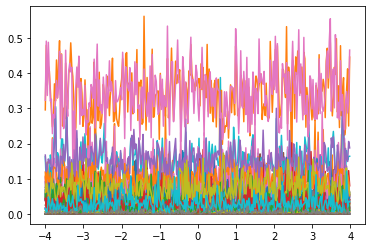

In [ ]:
x= np.arange(-4,4,0.0267)
y_true=O_test

plt.plot(x,y_true)
plt.plot(x,y_pred)

plt.show()

In [ ]:
#Testing for I only

In [ ]:
input_surrogate=Input(
    shape=(40,384,1), name="Input_surrogate")

In [ ]:
I_CNN_1=Conv2D(1, (3, 3), padding="same", activation= 'relu', name='I_CNN_1', input_shape = (40,384,1))(input_surrogate)

In [ ]:
max_pool_I_CNN_1=MaxPooling2D(pool_size=(2,4), padding='valid')(I_CNN_1)


In [ ]:
concat=concatenate([Flatten()(max_pool_I_CNN_1)])

In [ ]:
concat=Dropout(0.2)(concat)

In [ ]:
output_layer=Dense(15, activation= 'softmax', name='Output_layer')(concat)

In [ ]:
model=keras.Model(inputs=[input_surrogate], outputs=output_layer)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_surrogate (InputLayer  [(None, 40, 384, 1)]     0         
 )                                                               
                                                                 
 I_CNN_1 (Conv2D)            (None, 40, 384, 1)        10        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 96, 1)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1920)              0         
                                                                 
 concatenate_1 (Concatenate)  (None, 1920)             0         
                                                                 
 dropout_1 (Dropout)         (None, 1920)              0   

In [ ]:
model.compile(optimizer='adam', loss= tf.keras.losses.KLDivergence(), metrics=[tf.keras.losses.KLDivergence()])

In [ ]:
model.fit(
    [I_train],
    [O_train],
    batch_size=16,
    epochs=300)

Epoch 1/300
75/75 [==============================] - 1s 6ms/step - loss: 0.2032 - kl_divergence: 0.2032
Epoch 2/300
75/75 [==============================] - 0s 6ms/step - loss: 0.1346 - kl_divergence: 0.1346
Epoch 3/300
75/75 [==============================] - 0s 6ms/step - loss: 0.1217 - kl_divergence: 0.1217
Epoch 4/300
75/75 [==============================] - 0s 6ms/step - loss: 0.1075 - kl_divergence: 0.1075
Epoch 5/300
75/75 [==============================] - 0s 6ms/step - loss: 0.0953 - kl_divergence: 0.0953
Epoch 6/300
75/75 [==============================] - 0s 6ms/step - loss: 0.0860 - kl_divergence: 0.0860
Epoch 7/300
75/75 [==============================] - 0s 5ms/step - loss: 0.0797 - kl_divergence: 0.0797
Epoch 8/300
75/75 [==============================] - 0s 6ms/step - loss: 0.0759 - kl_divergence: 0.0759
Epoch 9/300
75/75 [==============================] - 0s 6ms/step - loss: 0.0743 - kl_divergence: 0.0744
Epoch 10/300
75/75 [==============================] - 0s 6ms/ste

In [ ]:
model.evaluate([I_test],
    [O_test],
    batch_size=16)

19/19 [==============================] - 0s 4ms/step - loss: 0.0638 - kl_divergence: 0.0639


[0.0638335794210434, 0.06385055929422379]